<a href="https://colab.research.google.com/github/NicoHeredia/hello-word/blob/master/Copia_de_Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2025**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000.0,5800000.0,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,6500000.0
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.0,10200000.0,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.0,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.0
2,2,Córdoba,Full-Time,Staff (planta permanente),3952805.0,3137662.0,Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,3952805.0
3,3,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),1606000.0,1360000.0,Cobro parte del salario en dólares,1004,No,No recibo bono,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,True,Semi-Senior,1606000.0
4,4,Córdoba,Full-Time,Tercerizado (trabajo a través de consultora o ...,1325301.0,NaN,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,22,Hombre Cis,Sí,True,Senior,1325301.0


# EJERCICIO 1

# 1. Selección de columnas para análisis

Vamos a ver cuales columnas tiene nuestro data frame de manera de seleccionar los de interes para el análisis.

In [4]:
df.columns

Index(['Unnamed: 0', 'work_province', 'work_dedication', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_last_dollar_value', 'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment', 'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'estas_buscando_trabajo', 'pluriempleo',
       'company_main_activity', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'company_days_in_the_office',
       'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales',
       'opcionalen_que_empresaorganizacion_estas_trabajando',

De estas columnas, nos vamos a interesar para hacer el an&aacute;lisis: Salario Bruto, Lenguaje de programación y para elegir las filas relevantes, "company_man_activity" y "seniority"

# 2. Selección de filas

Vamos a ver cuales son las profesiones, ya que el análisis lo haremos sobre una categoria de ellos, debido a que posiblemente no sean comparables por el campo de acción de cada una (compañías con ganancias desparejas entre si).

In [5]:
df['company_main_activity']

,company_main_activity
0,Manager / Director
1,Technical Leader
2,Data Engineer
3,Developer
4,SysAdmin / DevOps / SRE
...,...
5191,SysAdmin / DevOps / SRE
5192,Developer
5193,Developer
5194,SysAdmin / DevOps / SRE


Nos vamos a quedar con la actividad más frecuente por tener más datos para el análisis, y para comparar con la moda del seniority, que tambien nos dará más datos para comparar.

In [6]:
df['company_main_activity'].unique()
#df['company_main_activity'].value_counts()


array(['Manager / Director', 'Technical Leader', 'Data Engineer',
       'Developer', 'SysAdmin / DevOps / SRE', 'Technical Support',
       'Consultant', 'Architect', 'BI Analyst / Data Analyst', 'Designer',
       'UX Designer', 'Business Analyst', 'VP / C-Level', 'Networking',
       'Infosec', 'QA / Tester', 'Sales / Pre-Sales',
       'DBA (Database Administrator)', 'Recruiter', 'Data Scientist',
       'Engineer', 'HelpDesk', 'RPA', 'AI Engineer', 'Scrum Master',
       'UX Writer', 'UX Researcher', 'No sé encuentra acá',
       'Staff Engineer', 'Docente', 'Functional Analyst', 'Finance',
       'Fuera de IT', 'engineer', 'Marketing', 'Mechanical engineer',
       'Storage / Backup', 'Pasé por varios puestos pero ninguno fijo',
       'embedded engineer', 'Dataentry', 'Smart contracts engineer',
       'Firmware Engineer', 'Configuration Analyst', 'Middleware',
       'Technical Writer', 'GeneXus Analyst', 'Project Manager',
       'Administrativo', 'I+D', 'Electronic Engineer',

In [7]:
df['company_main_activity'].mode()[0]

'Developer'

In [8]:
df['seniority']

,seniority
0,Senior
1,Senior
2,Semi-Senior
3,Semi-Senior
4,Senior
...,...
5191,Senior
5192,Junior
5193,Semi-Senior
5194,Senior


In [16]:
df['seniority'].mode()[0]

'Senior'

Reformulación de la pregunta:
**¿Cuáles son los lenguajes de programación asociados a los mejores salarios para un desarrollador nivel senior?**

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 1000K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [11]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']

Ahora tenemos que corregir el df teniendo en cuenta las filas que son de interes

In [27]:
df_filtrado = df[df.isin(['developer']).any(axis=1)]
df_filtrado.columns

Index(['Unnamed: 0', 'work_province', 'work_dedication', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_last_dollar_value', 'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment', 'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'estas_buscando_trabajo', 'pluriempleo',
       'company_main_activity', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'company_days_in_the_office',
       'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales',
       'opcionalen_que_empresaorganizacion_estas_trabajando',

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [12]:
df.tools_programming_languages[:3]

,tools_programming_languages
0,Ninguno de los anteriores
1,"CSS, HTML, Java, Javascript, SQL, TypeScript"
2,SQL


Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [13]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,css,"CSS, HTML, Java, Javascript, SQL, TypeScript",12700000.0,"[css, html, java, javascript, sql, typescript]"
1,html,"CSS, HTML, Java, Javascript, SQL, TypeScript",12700000.0,"[css, html, java, javascript, sql, typescript]"
1,java,"CSS, HTML, Java, Javascript, SQL, TypeScript",12700000.0,"[css, html, java, javascript, sql, typescript]"
1,javascript,"CSS, HTML, Java, Javascript, SQL, TypeScript",12700000.0,"[css, html, java, javascript, sql, typescript]"
1,sql,"CSS, HTML, Java, Javascript, SQL, TypeScript",12700000.0,"[css, html, java, javascript, sql, typescript]"


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [14]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,frequency,count
0,sql,2295
1,javascript,1925
2,python,1689
3,html,1378
4,typescript,1078
5,css,968
6,bash/shell,901
7,java,855
8,php,641
9,.net,587


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [20]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#interesting_languages = ["python"]
interesting_languages = [df_lang['programming_language'].mode()[0]]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,sql,"CSS, HTML, Java, Javascript, SQL, TypeScript",12700000.00,"[css, html, java, javascript, sql, typescript]"
2,sql,SQL,3952805.00,[sql]
6,sql,".NET, Python, SQL",4000000.00,"[.net, python, sql]"
9,sql,"Bash/Shell, Python, SQL",3953142.06,"[bash/shell, python, sql]"
10,sql,"ABAP, Python, SQL",3100000.00,"[abap, python, sql]"


In [21]:
salary_col='salary_monthly_BRUTO'
df2=df_lang[(df_lang[salary_col] > 700000) & (df_lang[salary_col] < 5000000)]
print('Máximo',max(df2[salary_col]),'Mínimo',min(df2[salary_col]))

Máximo 4996109.0 Mínimo 705000.0


In [22]:
df2[salary_col].describe().apply(lambda s: '{0:2f}'.format(s))

,salary_monthly_BRUTO
count,12480.000000
mean,2381134.397434
std,1042182.901353
min,705000.000000
25%,1520000.000000
50%,2200000.000000
75%,3100000.000000
max,4996109.000000


In [ ]:
 df2.columns

Index(['programming_language', 'tools_programming_languages',
       'salary_monthly_BRUTO', 'cured_programming_languages'],
      dtype='object')

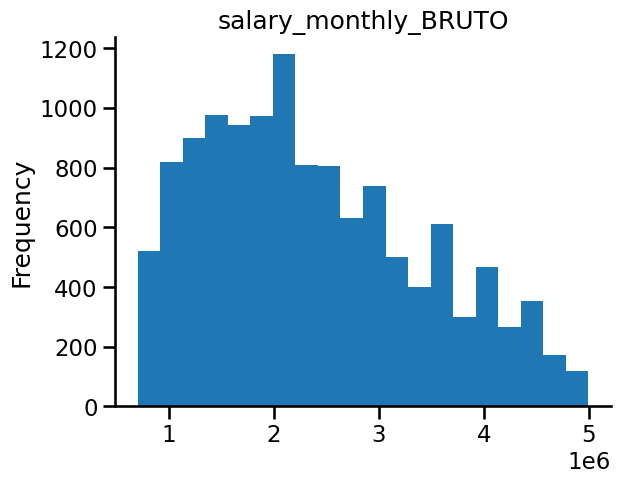

In [ ]:
# @title salary_monthly_BRUTO

from matplotlib import pyplot as plt
df2['salary_monthly_BRUTO'].plot(kind='hist', bins=20, title='salary_monthly_BRUTO')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
